## House price prediction for Australia - Surprise Housing
***
The steps followed are -

1. Reading, understanding and visualising the data
2. Preparing the data for modeling (train-test split, rescaling)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on the test set

In [520]:
#import all the required headers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import scale
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Read, analyse, visualise and clean the data
***

In [521]:
#Read the training data
house = pd.read_csv("C:\\Users\\venka\\Downloads\\train.csv")
house.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data exploration

In [522]:
# Explore the training data
house.shape

(1460, 81)

In [523]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [524]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


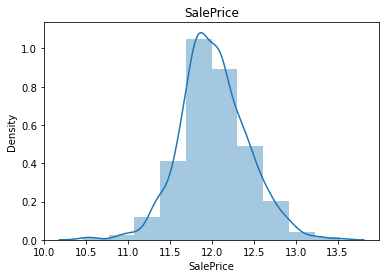

In [525]:
house['SalePrice'] = np.log1p(house['SalePrice'])
plt.title('SalePrice')
sns.distplot(house['SalePrice'], bins=10)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x22a8576b610>,
 'caps': [<matplotlib.lines.Line2D at 0x22a8576bbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a8576b460>],
 'medians': [<matplotlib.lines.Line2D at 0x22a85779190>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a85779460>],
 'means': []}

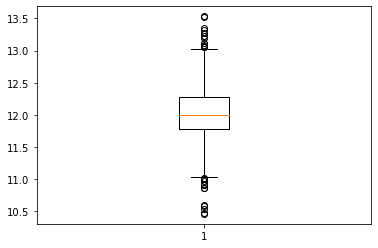

In [526]:
 plt.boxplot(house['SalePrice'])

#### Observation : The target variable is normalised wrt distribution but has some noise

In [527]:
# Method to remove outliers from the dataframe
def Remove_Outliers(inputCol, dt):    
    Q1 = dt[inputCol].quantile(0.1)
    Q3 = dt[inputCol].quantile(0.9)
    IQR = Q3 - Q1
    dt = dt[(dt[inputCol] >= Q1 -1.5*IQR) & (dt[inputCol] <= Q3 + 1.5*IQR)]
    return dt

{'whiskers': [<matplotlib.lines.Line2D at 0x22a857cb970>,
 'caps': [<matplotlib.lines.Line2D at 0x22a857cbf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a857cb6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x22a857d94f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a857d97c0>],
 'means': []}

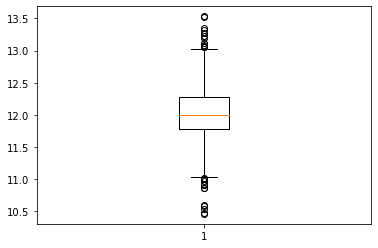

In [528]:
#Remove outliers for SalePrice, LotArea, ScreenPorch, MiscVal, PoolArea, MasVnrArea
house = Remove_Outliers("SalePrice", house)
plt.boxplot(house['SalePrice'])

In [529]:
house.shape

(1460, 81)

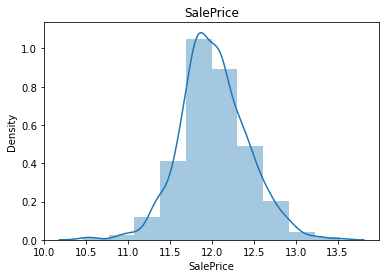

In [530]:
plt.title('SalePrice')
sns.distplot(house['SalePrice'], bins=10)
plt.show()

#### Observation : Now the outliers are removed from SalePrice traget variable

In [531]:
# Select all numeric variables in the dataset
house_numeric = house.select_dtypes(include=['float', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429220


In [532]:
# check for null values in all categorical columns
house.select_dtypes(include='object').isnull().sum()[house.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [533]:
# Replace NA with None in the following columns below : 
for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'):
    
    house[col]=house[col].fillna('None')
house.select_dtypes(include='object').isnull().sum()[house.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [534]:
# check the null values in the numerical data
house.select_dtypes(include=['int64','float']).isnull().sum()[house.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [535]:
#Impute with median for some of the columns
house['LotFrontage'] = house['LotFrontage'].replace(np.nan, house['LotFrontage'].median())
house['MasVnrArea'] = house['MasVnrArea'].replace(np.nan, house['MasVnrArea'].median())


In [536]:
# Setting the null values with 0 for GarageYrBlt
house['GarageYrBlt']=house['GarageYrBlt'].fillna(0)
house['GarageYrBlt'] = house['GarageYrBlt'].astype(int)
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
house['IsGarageNew'] = house['GarageYrBlt'].apply(getGarageConstructionPeriod)
house.drop('GarageYrBlt',axis=1, inplace = True)
house.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsGarageNew
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,12.247699,1
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,12.109016,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,12.317171,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,11.849405,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,12.429220,1


In [537]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRenovation(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
house['IsRenovated'] = house.apply(checkForRenovation, axis=1)

house.head()    



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsGarageNew,IsRenovated
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,0,2,2008,WD,Normal,12.247699,1,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,0,5,2007,WD,Normal,12.109016,0,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,0,9,2008,WD,Normal,12.317171,1,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,0,2,2006,WD,Abnorml,11.849405,0,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,0,12,2008,WD,Normal,12.429220,1,0


In [538]:
# Create a new column named BuildingAge to get Age of the building

def getBuildingAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
house['BuildingAge'] = house.apply(getBuildingAge, axis=1)
house.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis=1, inplace = True)
house.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,IsGarageNew,IsRenovated,BuildingAge
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,0,2,WD,Normal,12.247699,1,0,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,0,5,WD,Normal,12.109016,0,0,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,0,9,WD,Normal,12.317171,1,1,6
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,0,2,WD,Abnorml,11.849405,0,1,36
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,0,12,WD,Normal,12.429220,1,0,8


In [539]:
# check for % of null values in each column
percent_missing = round(100*(house.isnull().sum()/len(house.index)), 2)
print(percent_missing)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
SaleCondition    0.0
SalePrice        0.0
IsGarageNew      0.0
IsRenovated      0.0
BuildingAge      0.0
Length: 80, dtype: float64


#### Observation: No more null values in the categorical columns

In [540]:
# Check if there are any duplicate values in the dataset
house[house.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,IsGarageNew,IsRenovated,BuildingAge


In [541]:
#drop not so  important columns

house = house.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                                   'MoSold'], axis=1)
house.head()

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,IsGarageNew,IsRenovated,BuildingAge
0,1,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,WD,Normal,12.247699,1,0,5
1,2,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,None,0,WD,Normal,12.109016,0,0,31
2,3,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,None,0,WD,Normal,12.317171,1,1,6
3,4,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,None,0,WD,Abnorml,11.849405,0,1,36
4,5,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,None,0,WD,Normal,12.429220,1,0,8


In [542]:
# Drop the following columns that have more than 85% values associated to a specific value
def getHighValueCounts():
    column = []    
    for col in (house.select_dtypes(include=['int64', 'float', 'object'])):
        if(house[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighValueCounts()
house.drop(columnsToBeRemoved, axis = 1, inplace = True)

house.head()

,Id,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,...,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsGarageNew,IsRenovated,BuildingAge
0,1,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Gable,...,RFn,548,0,61,None,Normal,12.247699,1,0,5
1,2,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Gable,...,RFn,460,298,0,None,Normal,12.109016,0,0,31
2,3,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Gable,...,RFn,608,0,42,None,Normal,12.317171,1,1,6
3,4,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Gable,...,Unf,642,0,35,None,Abnorml,11.849405,0,1,36
4,5,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Gable,...,RFn,836,192,84,None,Normal,12.429220,1,0,8


#### Observation - No duplicate entries found

<Figure size 720x360 with 0 Axes>

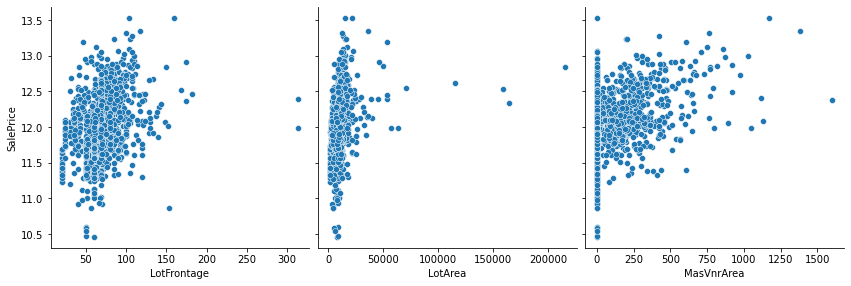

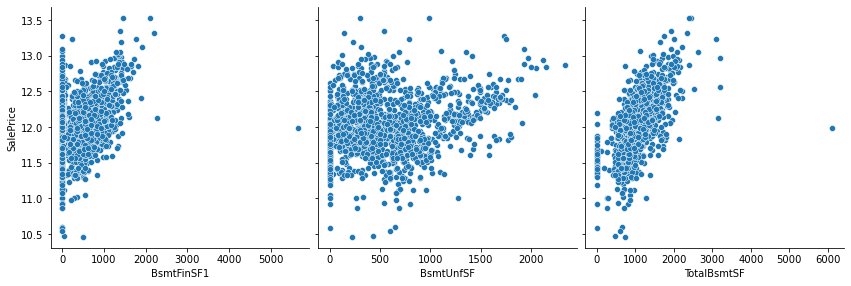

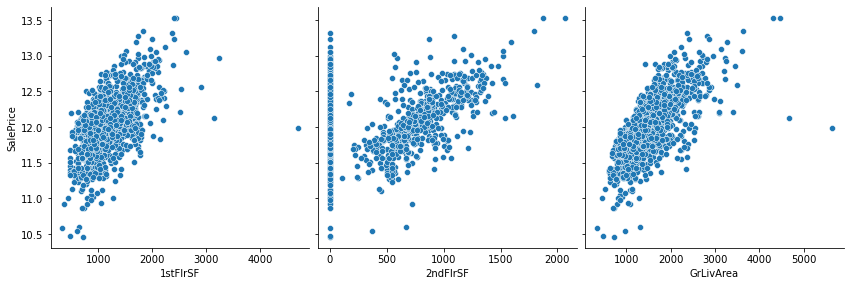

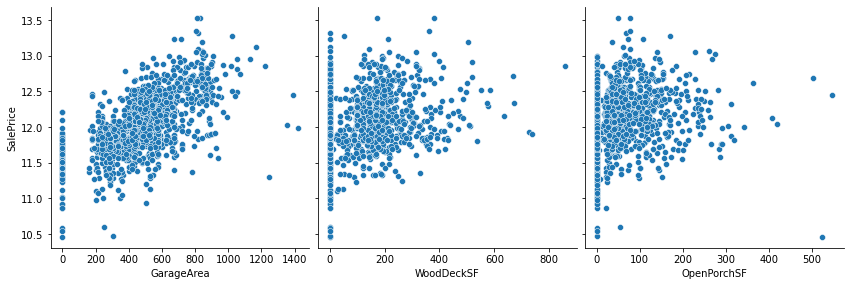

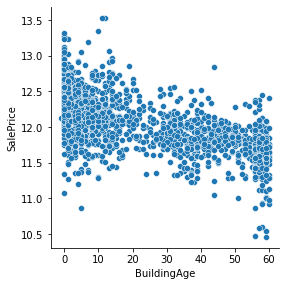

In [543]:
# visualise the data
# Check the numerical values using pairplots


plt.figure(figsize=(10,5))
sns.pairplot(house, x_vars=['LotFrontage','LotArea','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['GarageArea', 'WoodDeckSF','OpenPorchSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BuildingAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

In [544]:
## Outlier Analysis
house.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsGarageNew,IsRenovated,BuildingAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,472.980137,94.244521,46.660274,12.024057,0.275342,0.476712,22.950000
std,421.610009,22.027677,9981.264932,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,213.804841,125.338794,66.256028,0.399449,0.446840,0.499629,20.640653
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,10.460271,0.000000,0.000000,-1.000000
25%,365.750000,60.000000,7553.500000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,11.775105,0.000000,0.000000,4.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,12.001512,0.000000,0.000000,14.000000
75%,1095.250000,79.000000,11601.500000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,576.000000,168.000000,68.000000,12.273736,1.000000,1.000000,41.000000
90%,1314.100000,92.000000,14381.700000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,757.100000,262.000000,130.000000,12.535380,1.000000,1.000000,56.000000
95%,1387.050000,104.000000,17401.150000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,850.100000,335.000000,175.050000,12.694962,1.000000,1.000000,58.000000
99%,1445.410000,137.410000,37567.640000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,1002.790000,505.460000,285.820000,13.000325,1.000000,1.000000,60.000000


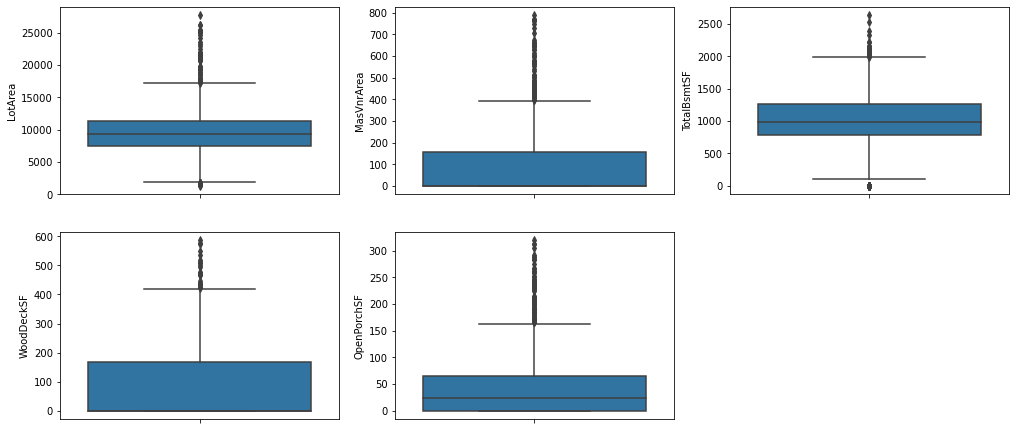

In [545]:
house = Remove_Outliers("LotArea", house)
house = Remove_Outliers("MasVnrArea", house)
house = Remove_Outliers("TotalBsmtSF", house)
house = Remove_Outliers("WoodDeckSF", house)
house = Remove_Outliers("OpenPorchSF", house)
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', data = house)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', data = house)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', data = house)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', data = house)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', data = house)
plt.show()

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

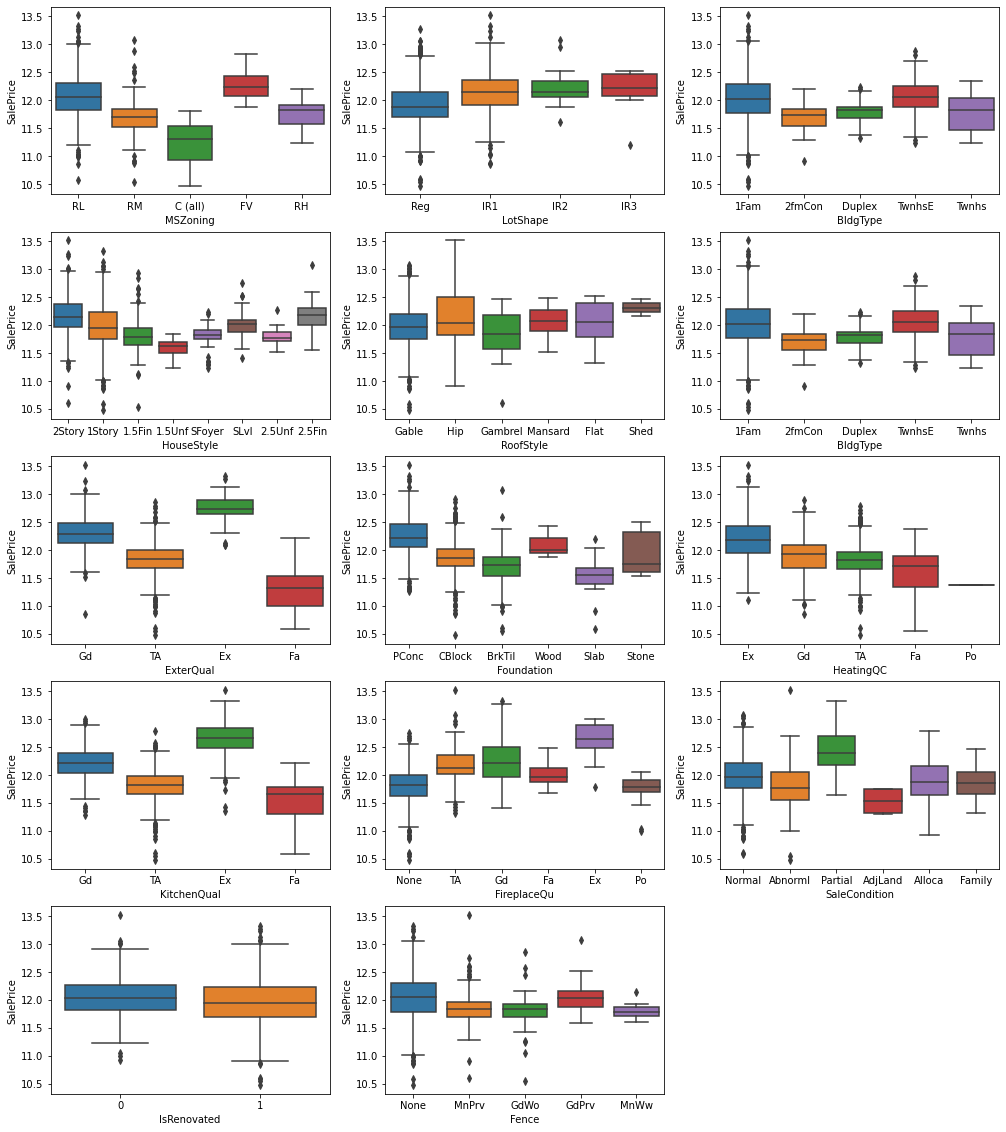

In [546]:
#Plot boxplots for some of the important aspects that impact house price
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = house)
plt.subplot(5,3,2)
sns.boxplot(x = 'LotShape',y = 'SalePrice', data = house)
plt.subplot(5,3,3)
sns.boxplot(x = 'BldgType',y = 'SalePrice', data = house)
plt.subplot(5,3,4)
sns.boxplot(x = 'HouseStyle',y = 'SalePrice', data = house)
plt.subplot(5,3,5)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = house)
plt.subplot(5,3,6)
sns.boxplot(x = 'BldgType',y = 'SalePrice', data = house)
plt.subplot(5,3,7)
sns.boxplot(x = 'ExterQual',y = 'SalePrice', data = house)
plt.subplot(5,3,8)
sns.boxplot(x = 'Foundation',y = 'SalePrice', data = house)
plt.subplot(5,3,9)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = house)
plt.subplot(5,3,10)
sns.boxplot(x = 'KitchenQual',y = 'SalePrice', data = house)
plt.subplot(5,3,11)
sns.boxplot(x = 'FireplaceQu',y = 'SalePrice', data = house)
plt.subplot(5,3,12)
sns.boxplot(x = 'SaleCondition',y = 'SalePrice', data = house)
plt.subplot(5,3,13)
sns.boxplot(x = 'IsRenovated',y = 'SalePrice', data = house)
plt.subplot(5,3,14)
sns.boxplot(x = 'Fence',y = 'SalePrice', data = house)
#plt.subplot(5,3,15)
#sns.scatterplot(x = 'BuildingAge',y = 'SalePrice', data = house)



#### Observation :
1. Floating Village Residential has higher impact on saleprice in MSZoning
2. Shed as RoofStyle has high saleprice
3. Excellent - External Quality, Fireplace quality and Kitchen quality has high impact on saleprice
4. New homes has high saleprice



In [547]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 0 to 1458
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1410 non-null   int64  
 1   MSZoning       1410 non-null   object 
 2   LotFrontage    1410 non-null   float64
 3   LotArea        1410 non-null   int64  
 4   LotShape       1410 non-null   object 
 5   LotConfig      1410 non-null   object 
 6   Neighborhood   1410 non-null   object 
 7   BldgType       1410 non-null   object 
 8   HouseStyle     1410 non-null   object 
 9   RoofStyle      1410 non-null   object 
 10  Exterior1st    1410 non-null   object 
 11  Exterior2nd    1410 non-null   object 
 12  MasVnrType     1410 non-null   object 
 13  MasVnrArea     1410 non-null   float64
 14  ExterQual      1410 non-null   object 
 15  Foundation     1410 non-null   object 
 16  BsmtQual       1410 non-null   object 
 17  BsmtExposure   1410 non-null   object 
 18  BsmtFinT

In [548]:
corr = house.corr()
corr

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsGarageNew,IsRenovated,BuildingAge
Id,1.000000,-0.016183,0.006734,-0.039495,-0.004311,-0.004378,-0.009857,0.016181,-0.000916,0.006504,0.016187,-0.041709,-0.013750,-0.007236,0.008680,-0.001568,0.015297
LotFrontage,-0.016183,1.000000,0.566733,0.152026,0.125649,0.126425,0.283890,0.357666,0.063651,0.323646,0.301089,0.064811,0.120174,0.346595,0.070369,-0.033344,-0.079235
LotArea,0.006734,0.566733,1.000000,0.112153,0.161264,0.090521,0.296014,0.401701,0.116503,0.402380,0.310510,0.147790,0.138425,0.391400,-0.011463,0.013101,-0.049880
MasVnrArea,-0.039495,0.152026,0.112153,1.000000,0.229071,0.110389,0.339576,0.324381,0.120436,0.336904,0.369283,0.164254,0.162215,0.420417,0.176164,-0.137752,-0.167757
BsmtFinSF1,-0.004311,0.125649,0.161264,0.229071,1.000000,-0.541034,0.446218,0.369904,-0.173705,0.113509,0.258567,0.184819,0.086530,0.378916,0.015197,-0.115077,-0.127068
BsmtUnfSF,-0.004378,0.126425,0.090521,0.110389,-0.541034,1.000000,0.442334,0.328049,-0.011818,0.234308,0.180939,-0.001808,0.128162,0.211271,0.336747,0.024671,-0.175181
TotalBsmtSF,-0.009857,0.283890,0.296014,0.339576,0.446218,0.442334,1.000000,0.792096,-0.234318,0.374947,0.467921,0.226201,0.231867,0.633719,0.325600,-0.102497,-0.301697
1stFlrSF,0.016181,0.357666,0.401701,0.324381,0.369904,0.328049,0.792096,1.000000,-0.257231,0.510173,0.468844,0.218531,0.192632,0.605229,0.221693,-0.036267,-0.247050
2ndFlrSF,-0.000916,0.063651,0.116503,0.120436,-0.173705,-0.011818,-0.234318,-0.257231,1.000000,0.694101,0.123802,0.063309,0.200923,0.303309,0.053073,0.102265,-0.128060
GrLivArea,0.006504,0.323646,0.402380,0.336904,0.113509,0.234308,0.374947,0.510173,0.694101,1.000000,0.447117,0.214191,0.320612,0.708157,0.202910,0.075306,-0.288052


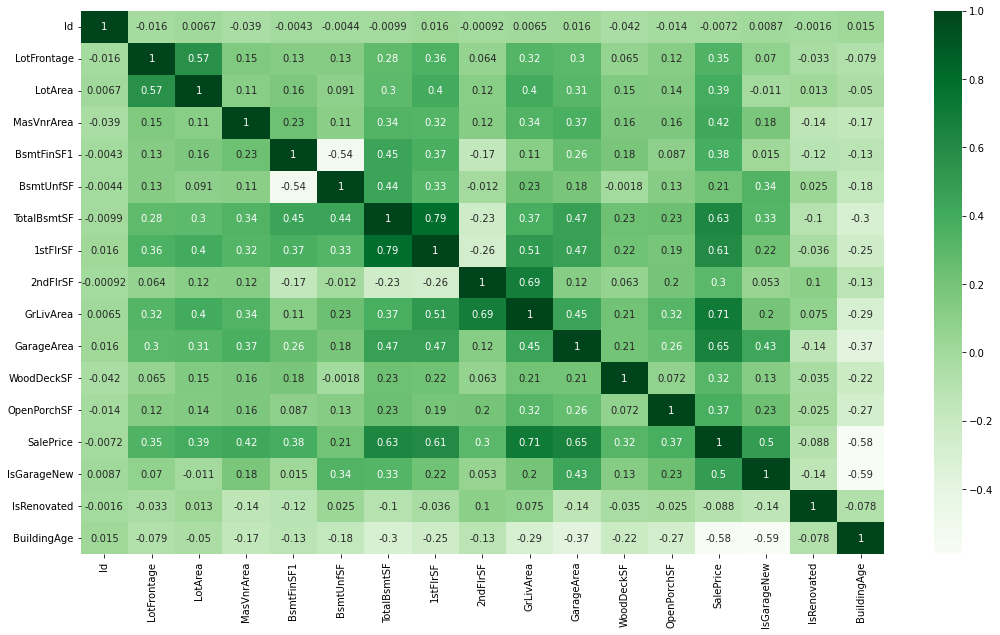

In [549]:
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.show()

### 2. Preparing the data
***

In [550]:
house.head()

,Id,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,...,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsGarageNew,IsRenovated,BuildingAge
0,1,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Gable,...,RFn,548,0,61,None,Normal,12.247699,1,0,5
1,2,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Gable,...,RFn,460,298,0,None,Normal,12.109016,0,0,31
2,3,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Gable,...,RFn,608,0,42,None,Normal,12.317171,1,1,6
3,4,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Gable,...,Unf,642,0,35,None,Abnorml,11.849405,0,1,36
4,5,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Gable,...,RFn,836,192,84,None,Normal,12.429220,1,0,8


In [551]:
house['d_LotShape'] = house['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house['d_ExterQual'] = house['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house['d_BsmtQual'] = house['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_BsmtExposure'] = house['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house['d_BsmtFinType1'] = house['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house['d_HeatingQC'] = house['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_KitchenQual'] = house['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_FireplaceQu'] = house['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_GarageFinish'] = house['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house['d_BldgType'] = house['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house['d_HouseStyle'] = house['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house['d_Fence'] = house['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
house['d_LotConfig'] = house['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house['d_MasVnrType'] = house['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house['d_SaleCondition'] = house['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
house.head()

,Id,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Gable,...,5,4,0,2,1,4,0,5,1,1
1,2,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Gable,...,5,3,3,2,1,1,0,2,0,1
2,3,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Gable,...,5,4,3,2,1,4,0,5,1,1
3,4,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Gable,...,4,4,4,1,1,4,0,4,0,0
4,5,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Gable,...,5,4,3,2,1,4,0,2,1,1


In [552]:
house = house.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

house.head()

,MSZoning,LotFrontage,LotArea,Neighborhood,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,RL,65.0,8450,CollgCr,Gable,VinylSd,VinylSd,196.0,PConc,706,...,5,4,0,2,1,4,0,5,1,1
1,RL,80.0,9600,Veenker,Gable,MetalSd,MetalSd,0.0,CBlock,978,...,5,3,3,2,1,1,0,2,0,1
2,RL,68.0,11250,CollgCr,Gable,VinylSd,VinylSd,162.0,PConc,486,...,5,4,3,2,1,4,0,5,1,1
3,RL,60.0,9550,Crawfor,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,...,4,4,4,1,1,4,0,4,0,0
4,RL,84.0,14260,NoRidge,Gable,VinylSd,VinylSd,350.0,PConc,655,...,5,4,3,2,1,4,0,2,1,1


In [553]:


# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(house['MSZoning'], prefix='MSZoning', drop_first = True)
house = pd.concat([house, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(house['Neighborhood'], prefix='Neighborhood', drop_first = True)
house = pd.concat([house, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(house['RoofStyle'], prefix='RoofStyle', drop_first = True)
house = pd.concat([house, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(house['Exterior1st'], prefix='Exterior1st', drop_first = True)
house = pd.concat([house, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(house['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
house = pd.concat([house, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(house['Foundation'], prefix='Foundation', drop_first = True)
house = pd.concat([house, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(house['GarageType'], prefix='GarageType', drop_first = True)
house = pd.concat([house, d_GarageType], axis = 1)

house.head()



,MSZoning,LotFrontage,LotArea,Neighborhood,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,RL,65.0,8450,CollgCr,Gable,VinylSd,VinylSd,196.0,PConc,706,...,1,0,0,0,1,0,0,0,0,0
1,RL,80.0,9600,Veenker,Gable,MetalSd,MetalSd,0.0,CBlock,978,...,0,0,0,0,1,0,0,0,0,0
2,RL,68.0,11250,CollgCr,Gable,VinylSd,VinylSd,162.0,PConc,486,...,1,0,0,0,1,0,0,0,0,0
3,RL,60.0,9550,Crawfor,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,...,0,0,0,0,0,0,0,0,1,0
4,RL,84.0,14260,NoRidge,Gable,VinylSd,VinylSd,350.0,PConc,655,...,1,0,0,0,1,0,0,0,0,0


In [554]:
# drop the below columns as we now have new columns derived from these columns
house = house.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)
house.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,65.0,8450,196.0,706,150,856,856,854,1710,548,...,1,0,0,0,1,0,0,0,0,0
1,80.0,9600,0.0,978,284,1262,1262,0,1262,460,...,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,162.0,486,434,920,920,866,1786,608,...,1,0,0,0,1,0,0,0,0,0
3,60.0,9550,0.0,216,540,756,961,756,1717,642,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,350.0,655,490,1145,1145,1053,2198,836,...,1,0,0,0,1,0,0,0,0,0


In [555]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 0 to 1458
Columns: 104 entries, LotFrontage to GarageType_None
dtypes: float64(3), int64(28), uint8(73)
memory usage: 453.0 KB


#### With this now all columns are numeric

### Test train split
***

In [556]:
# Assign X and Y
X = house.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,65.0,8450,196.0,706,150,856,856,854,1710,548,...,1,0,0,0,1,0,0,0,0,0
1,80.0,9600,0.0,978,284,1262,1262,0,1262,460,...,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,162.0,486,434,920,920,866,1786,608,...,1,0,0,0,1,0,0,0,0,0
3,60.0,9550,0.0,216,540,756,961,756,1717,642,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,350.0,655,490,1145,1145,1053,2198,836,...,1,0,0,0,1,0,0,0,0,0


In [557]:
y = house['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Scaling the features

In [558]:
# scaling the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=103)

In [559]:
# split into train and test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(986, 103)
(423, 103)
(986,)
(423,)


### 3. Training the model
***

In [560]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, step=50)            
rfe = rfe.fit(X_train, y_train)

In [561]:
# Assign the columns selected by RFE to cols
col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,BsmtFinSF1,True,1
2,TotalBsmtSF,True,1
3,GrLivArea,True,1
4,GarageArea,True,1
5,IsRenovated,True,1
6,BuildingAge,True,1
7,d_ExterQual,True,1
8,d_BsmtQual,True,1
9,d_BsmtExposure,True,1


In [562]:
X_train_rfe = X_train[col]
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [563]:
X_train.shape

(986, 51)

In [564]:
X_test.shape

(423, 51)

### Ridge Regression
***

In [565]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [566]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.092125,-0.098481,1
1,0.001,-0.092125,-0.098481,2
2,0.01,-0.092125,-0.098481,3
3,0.1,-0.092127,-0.098481,4
4,0.2,-0.092128,-0.098482,5
5,0.3,-0.092130,-0.098483,6
6,0.4,-0.092132,-0.098484,7
7,0.5,-0.092133,-0.098485,8
8,0.6,-0.092135,-0.098485,9
9,0.7,-0.092137,-0.098486,10


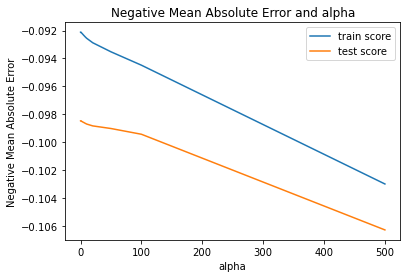

In [567]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [568]:
ridge_model_cv.best_estimator_

Ridge(alpha=0.0001)

In [571]:
# coefficient values with lambda = 20
alpha = 0.0001
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.61351530e-02,  3.62049101e-02,  2.98045846e-02,  1.40351595e-01,
        5.38987113e-02, -2.00741927e-02, -4.97128543e-02,  2.98834801e-02,
        3.08605822e-02,  2.16771008e-02,  1.94182644e-02,  3.18471422e-02,
        3.30600340e-02, -1.81895341e-02,  7.97240148e-02,  3.65554029e-02,
        1.46985599e-01,  1.21471185e-01, -1.14321538e-02,  2.66684605e-02,
       -2.17353613e-02, -1.32515601e-02, -2.22552807e-02, -1.06148931e-02,
       -9.35558468e-03, -2.26897934e-02, -9.29659900e-03,  1.85300516e-02,
        1.65968478e-03, -2.66539842e-02,  3.64538942e-26, -1.72514728e-04,
       -1.57892119e-02, -2.10342551e-02, -1.98062817e-02,  0.00000000e+00,
       -3.42989424e-02, -4.56943767e-02,  9.58898335e-04,  3.57018687e-26,
       -1.72515535e-04,  1.25264525e-02,  3.59631065e-26,  5.59476061e-03,
        4.53170818e-03,  1.36543914e-02,  3.21503583e-02,  1.20368314e-02,
        2.74489225e-02,  3.03486277e-02,  1.62245553e-02])

In [573]:
# mean squared error
mean_squared_error(y_test, ridge.predict(X_test))

0.016644575120509254

In [575]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0161
1,BsmtFinSF1,0.0362
2,TotalBsmtSF,0.0298
3,GrLivArea,0.1404
4,GarageArea,0.0539
5,IsRenovated,-0.0201
6,BuildingAge,-0.0497
7,d_ExterQual,0.0299
8,d_BsmtQual,0.0309
9,d_BsmtExposure,0.0217


In [577]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0161,
 'BsmtFinSF1': 0.0362,
 'TotalBsmtSF': 0.0298,
 'GrLivArea': 0.1404,
 'GarageArea': 0.0539,
 'IsRenovated': -0.0201,
 'BuildingAge': -0.0497,
 'd_ExterQual': 0.0299,
 'd_BsmtQual': 0.0309,
 'd_BsmtExposure': 0.0217,
 'd_HeatingQC': 0.0194,
 'd_KitchenQual': 0.0318,
 'd_FireplaceQu': 0.0331,
 'd_BldgType': -0.0182,
 'MSZoning_FV': 0.0797,
 'MSZoning_RH': 0.0366,
 'MSZoning_RL': 0.147,
 'MSZoning_RM': 0.1215,
 'Neighborhood_CollgCr': -0.0114,
 'Neighborhood_Crawfor': 0.0267,
 'Neighborhood_Edwards': -0.0217,
 'Neighborhood_IDOTRR': -0.0133,
 'Neighborhood_MeadowV': -0.0223,
 'Neighborhood_Mitchel': -0.0106,
 'Neighborhood_NAmes': -0.0094,
 'Neighborhood_OldTown': -0.0227,
 'Neighborhood_Sawyer': -0.0093,
 'Neighborhood_StoneBr': 0.0185,
 'Exterior1st_AsphShn': 0.0017,
 'Exterior1st_BrkComm': -0.0267,
 'Exterior1st_CBlock': 0.0,
 'Exterior1st_CemntBd': -0.0002,
 'Exterior1st_HdBoard': -0.0158,
 'Exterior1st_MetalSd': -0.021,
 'Exterior1st_Plywood': -0.0198,
 'Exterior1

### One more round of Feature elimination and limiting to 15
***

In [580]:
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, step=15)            
rfe = rfe.fit(X_train_ridge, y_train)


def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
14,MSZoning_RL,True,1,0.1470
2,GrLivArea,True,1,0.1404
15,MSZoning_RM,True,1,0.1215
12,MSZoning_FV,True,1,0.0797
3,GarageArea,True,1,0.0539
13,MSZoning_RH,True,1,0.0366
0,BsmtFinSF1,True,1,0.0362
11,d_FireplaceQu,True,1,0.0331
22,Exterior2nd_Wd Sdng,True,1,0.0322
10,d_KitchenQual,True,1,0.0318


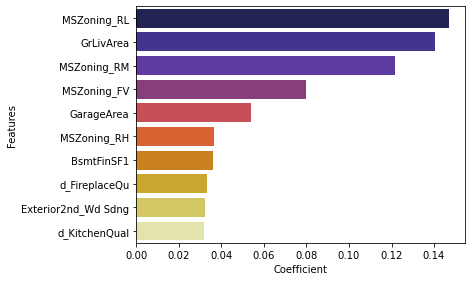

In [589]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='CMRmap', data = temp1_df)
plt.show()

### Trying Lasso Regression
***

In [590]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [591]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.092162,-0.098511,1
1,0.0002,-0.092221,-0.098576,2
2,0.0003,-0.092298,-0.098618,3
3,0.0004,-0.092383,-0.098658,4
4,0.0005,-0.092478,-0.098727,5
5,0.001,-0.093034,-0.099343,6
6,0.002,-0.094355,-0.099803,7
7,0.003,-0.095241,-0.099929,8
8,0.004,-0.095802,-0.100180,9
9,0.005,-0.096106,-0.100300,10


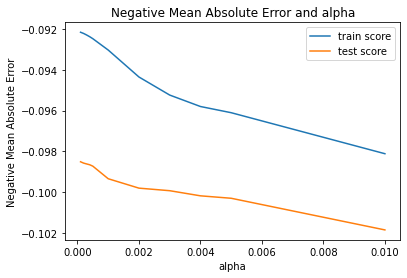

In [592]:
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [594]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [596]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.01607343,  0.03618028,  0.02988422,  0.14028065,  0.05376965,
       -0.01993234, -0.04959377,  0.0300564 ,  0.03076594,  0.02152782,
        0.0192166 ,  0.03196682,  0.03324835, -0.01816032,  0.07614221,
        0.03443236,  0.13954856,  0.11512016, -0.01106518,  0.02674025,
       -0.02137598, -0.01384762, -0.02209539, -0.01038266, -0.00875463,
       -0.02268988, -0.00901981,  0.01846857,  0.00215852, -0.02645398,
        0.        ,  0.        , -0.01474216, -0.01470846, -0.01861832,
        0.        , -0.02822415, -0.04346412,  0.        ,  0.        ,
        0.        ,  0.00680361,  0.        ,  0.00494042,  0.00424398,
        0.00861757,  0.03052777,  0.01112113,  0.02681026,  0.03002176,
        0.01581448])

In [597]:
mean_squared_error(y_test, lasso.predict(X_test))

0.01661180819145302

In [599]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0161
1,BsmtFinSF1,0.0362
2,TotalBsmtSF,0.0299
3,GrLivArea,0.1403
4,GarageArea,0.0538
5,IsRenovated,-0.0199
6,BuildingAge,-0.0496
7,d_ExterQual,0.0301
8,d_BsmtQual,0.0308
9,d_BsmtExposure,0.0215


In [600]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.01607342723380535,
 'BsmtFinSF1': 0.03618027638256612,
 'TotalBsmtSF': 0.029884215013809553,
 'GrLivArea': 0.1402806471228083,
 'GarageArea': 0.05376964737511647,
 'IsRenovated': -0.019932335054517823,
 'BuildingAge': -0.049593768983778104,
 'd_ExterQual': 0.030056400919869282,
 'd_BsmtQual': 0.0307659369387064,
 'd_BsmtExposure': 0.02152782213562369,
 'd_HeatingQC': 0.019216597016540188,
 'd_KitchenQual': 0.031966816543594914,
 'd_FireplaceQu': 0.03324835143644157,
 'd_BldgType': -0.01816031616465826,
 'MSZoning_FV': 0.07614220504434178,
 'MSZoning_RH': 0.034432364206349146,
 'MSZoning_RL': 0.1395485641484368,
 'MSZoning_RM': 0.11512016348415079,
 'Neighborhood_CollgCr': -0.011065180575105953,
 'Neighborhood_Crawfor': 0.026740250108794557,
 'Neighborhood_Edwards': -0.021375980739580285,
 'Neighborhood_IDOTRR': -0.013847623530361891,
 'Neighborhood_MeadowV': -0.022095387194335774,
 'Neighborhood_Mitchel': -0.010382662245030162,
 'Neighborhood_NAmes': -0.008754632628871845

#### Use RFE to limit to 15 features

In [603]:
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, step=15)            
rfe = rfe.fit(X_train_lasso, y_train)
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
2,GrLivArea,True,1,0.140281
13,MSZoning_RL,True,1,0.139549
14,MSZoning_RM,True,1,0.115120
11,MSZoning_FV,True,1,0.076142
3,GarageArea,True,1,0.053770
0,BsmtFinSF1,True,1,0.036180
12,MSZoning_RH,True,1,0.034432
10,d_FireplaceQu,True,1,0.033248
9,d_KitchenQual,True,1,0.031967
6,d_BsmtQual,True,1,0.030766


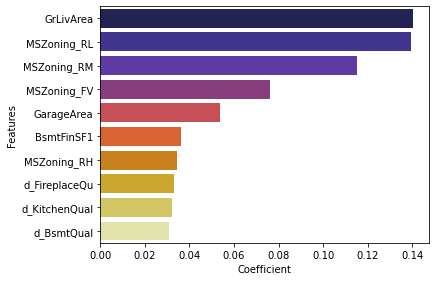

In [605]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='CMRmap', data = temp2_df)
plt.show()

### Conclusion
***

1. The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge : 0.0001
    - Lasso : 0.0001
2. Mean Squared error in case of Ridge and Lasso are:
    - Ridge : 0.01664
    - Lasso : 0.01661
    
The lambda and Mean Squared error is same in both Ridge and Lasso Regression.
Since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are the Living area square feet, Zoning classification, garage area, Fireplace quality, Kitchen quality and Basement quality along with the Basement finished square feet area
